In [ ]:
from vtc_utils import find_logfile, get_VTC_from_file, plot_VTC, SDT
import os
from saflow_params import BLOCS_LIST
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

SUBJ_LIST = ['04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']


In [ ]:
def count_trials(logs_data, trials_list):
    correct_comission = 0
    correct_omission = 0
    error_comission = 0
    error_omission = 0
    responses = [52,55]
    for trial in trials_list:
        if logs_data[trial][2] == 1: 
            if logs_data[trial][9] not in responses or logs_data[trial+1][9] not in responses: # if an upcoming rare has no response, or the next trial has no response, then its a hit
                correct_omission += 1
            else:
                error_comission += 1
        if logs_data[trial][2] == 2:
            if logs_data[trial][9] in responses or logs_data[trial+1][9] in responses:
                correct_comission += 1
            else:
                error_omission += 1  
    return correct_omission, correct_comission, error_comission, error_omission

def compute_all_SDT(log_files, SUBJ_LIST, BLOCS_LIST, metric='d', lobound=None, hibound=None):
    Ds_IN = []
    Ds_OUT = []
    for SUBJ in SUBJ_LIST:
        subj_IN = []
        subj_OUT = []
        for BLOC in BLOCS_LIST:
            logfile = find_logfile(SUBJ, BLOC, log_files)
            logs = loadmat(log_dir + logfile)
            VTC, INbounds, OUTbounds, INzone, OUTzone = get_VTC_from_file(log_dir + logfile, lobound=lobound, hibound=hibound)
            IN_co, IN_cc, IN_ec, IN_eo = count_trials(logs['data'], INzone)
            OUT_co, OUT_cc, OUT_ec, OUT_eo = count_trials(logs['data'], OUTzone)
            IN_SDT = SDT(IN_co, IN_ec, IN_eo, IN_cc)
            OUT_SDT = SDT(OUT_co, OUT_ec, OUT_eo, OUT_cc)
            subj_IN.append(IN_SDT[metric])
            subj_OUT.append(OUT_SDT[metric])
        Ds_IN.append(np.mean(subj_IN))
        Ds_OUT.append(np.mean(subj_OUT))
    Ds_IN = np.array(Ds_IN)
    Ds_OUT = np.array(Ds_OUT)
    return Ds_IN, Ds_OUT
        
    
def plot_SDT_metric(Ds_IN, Ds_OUT, savefig=False, savepath=None, metric='d', lobound=None, hibound=None, pval=None):
    # your input data:
    befores = np.array(Ds_IN)
    afters = np.array(Ds_OUT)

    # plotting the points
    plt.scatter(np.zeros(len(befores)), befores)
    plt.scatter(np.ones(len(afters)), afters)

    # plotting the lines
    for i in range(len(befores)):
        plt.plot( [0,1], [befores[i], afters[i]], c='k')

    plt.xticks([0,1], ['IN', 'OUT'])
    if lobound != None and hibound != None:
        title = '{}_IN{}OUT{}_p{}'.format(metric, int(lobound*100), int(hibound*100), round(pval, 5))
    else:
        title = '{}_INOUT_p{}'.format(metric, round(pval, 5))
    plt.title(title)
    if savefig == True:
        plt.savefig(savepath + title + '.png')
    plt.show()

tval = 2.904833470049274, pval = 0.014320763189997142


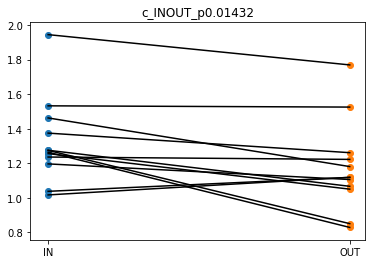

tval = -1.3458049359118345, pval = 0.2054476616289181


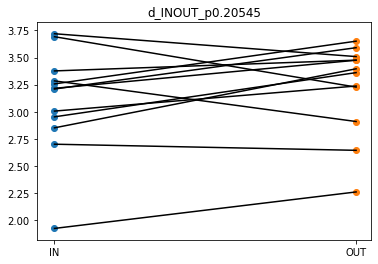

tval = 2.1579325493858437, pval = 0.05389790293361024


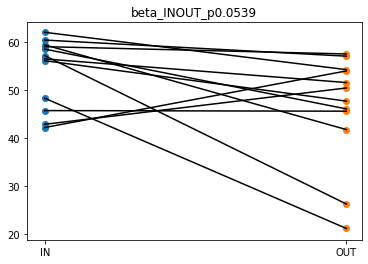

tval = -1.1802692731316338, pval = 0.26278688316831933


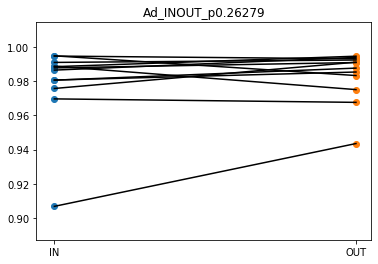

In [74]:
SAVEPATH = '/home/hyruuk/pCloudDrive/science/saflow/images/behav/'
log_dir = '/home/hyruuk/pCloudDrive/science/saflow/gradCPT/gradCPT_share_Mac_PC/gradCPT_share_Mac_PC/saflow_data/'
log_files = os.listdir(log_dir)

lobound=None
hibound=None

metrics = ['c', 'd', 'beta', 'Ad']
for metric in metrics:
    Ds_IN, Ds_OUT = compute_all_SDT(log_files, SUBJ_LIST, BLOCS_LIST, metric=metric, lobound=lobound, hibound=hibound)
    tval, pval = ttest_rel(Ds_IN, Ds_OUT)
    print('tval = {}, pval = {}'.format(tval, pval))
    plot_SDT_metric(Ds_IN, Ds_OUT, savefig=True, savepath=SAVEPATH, metric=metric, lobound=lobound, hibound=hibound, pval=pval)
